# 参考サイト 
- https://github.com/cnloni/tensorflow-bezier/blob/master/main3.py
- [TensorFlow APIドキュメントを眺める -Math編-](https://dev.classmethod.jp/machine-learning/tensorflow-math/)

In [1]:
from sympy import *
from sympy.abc import a,b,c
init_session()
import numpy as np
%matplotlib inline
from sympy import var
from rdlib2 import *

IPython console for SymPy 1.2 (Python 3.6.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/

IPython console for SymPy 1.2 (Python 3.6.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



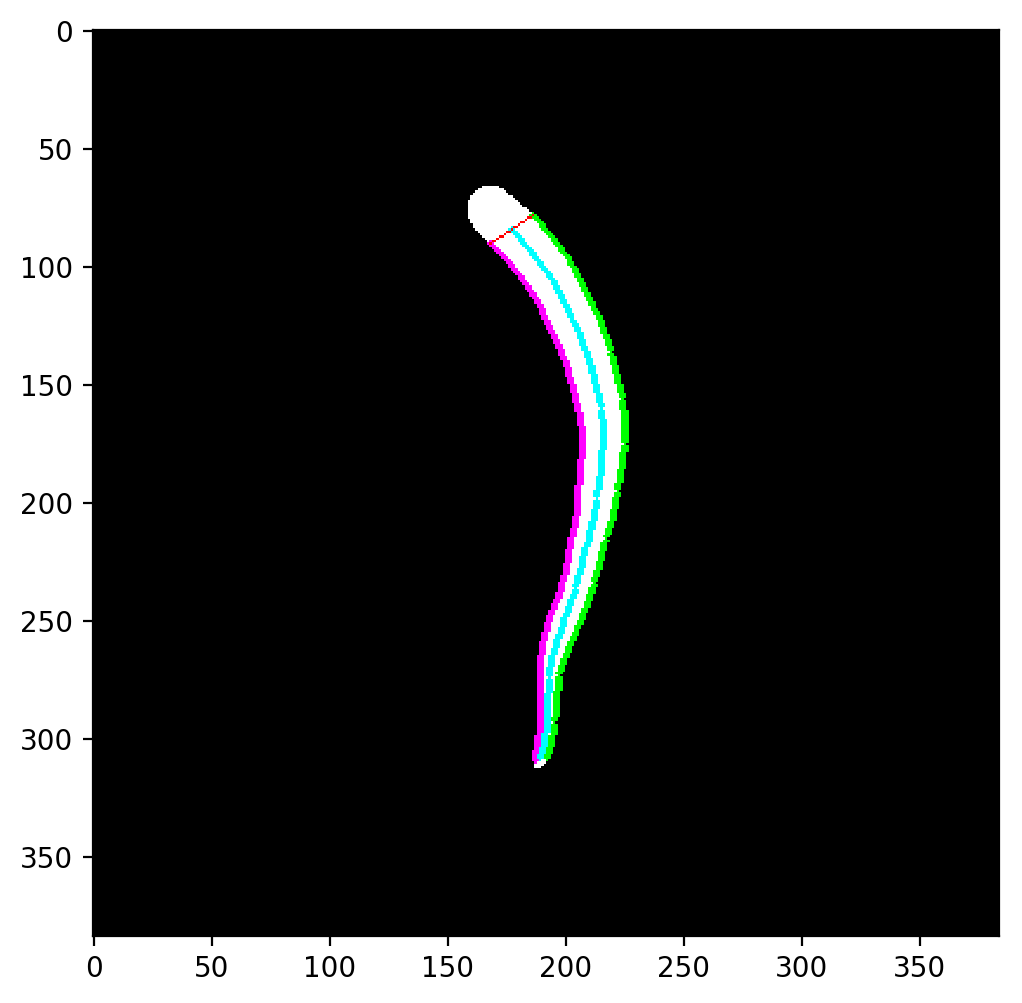

In [103]:
%matplotlib inline
UNIT = 256
path='シルエット/17Horn/17aomida1o02_l.jpg'
# 画像の読み込み
src = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
# 画像サイズを標準化する。
img = getstandardShape(src, unitSize=UNIT,showResult=False)
ll,rl,cl,dmax  = threeLinesSeq(img, showImage =  True);

diffpara 0.04345088638365269
diffpara 0.009999990463256836
diffpara 0.06611978448927402
diffpara 0.0
diffpara 0.038960957899689674
diffpara 0.010000020265579224
diffpara 0.02000001072883606
diffpara 0.0


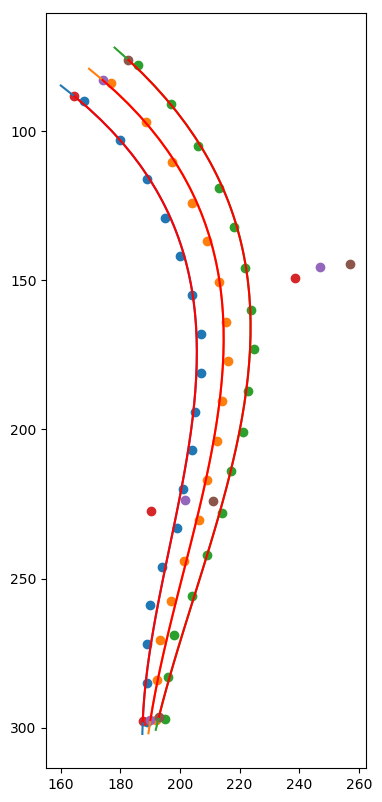

In [104]:
%matplotlib inline
# サンプル点が多すぎるので１６個まで間引く
n = int(len(ll)/16)
ll2 = np.array(ll)[::n]
rl2 = np.array(rl)[::n]
cl2 = np.array(cl)[::n]
ldata,cdata,rdata = fitBezierAndDraw([ll2,cl2,rl2],mode=4,showImage=True)

# 座標変換

画像データは下がY方向の正方向であるが、思考の妨げとなるので以下では数学の習慣に合わせて上が正となるように変換して扱おうと思う。

また、ついでに高さが概ね1となるよう正規化する。高さは今得られている中心軸概形の高さを基準にする。

In [105]:
def normalizeR(ldata,cdata,rdata,ll,cl,rl,showImage=True):
    [cpxl,cpyl,bezXl,bezYl,tpl]=ldata
    [cpxc,cpyc,bezXc,bezYc,tpc]=cdata
    [cpxr,cpyr,bezXr,bezYr,tpr]=rdata

    xbase = cpxc[-1] # 一番下の点を基準点とする
    ybase = cpyc[-1] # 
    unit = np.max(cpyc)-np.min(cpyc) # 正規化の基準ながさ
    # 各データの座標変換
    cpxl,cpxc,cpxr = cpxl-xbase,cpxc-xbase,cpxr-xbase
    cpyl,cpyc,cpyr = ybase-cpyl,ybase-cpyc,ybase-cpyr
    cpxl,cpxc,cpxr = cpxl/unit,cpxc/unit,cpxr/unit
    cpyl,cpyc,cpyr = cpyl/unit,cpyc/unit,cpyr/unit
    # P0,P1,P2,P3 の並びを逆順に（下から上）
    cpxl,cpxc,cpxr = cpxl[::-1],cpxc[::-1],cpxr[::-1]
    cpyl,cpyc,cpyr = cpyl[::-1],cpyc[::-1],cpyr[::-1]
    # サンプル点の位置を正規化すると共に逆順に（下から上）
    ll[:,1],rl[:,1],cl[:,1] = ybase-ll[::-1,1],ybase-rl[::-1,1],ybase-cl[::-1,1]
    ll[:,0],rl[:,0],cl[:,0] = ll[::-1,0]-xbase,rl[::-1,0]-xbase,cl[::-1,0]-xbase
    
    ll,rl,cl = ll/unit,rl/unit,cl/unit
    t0l,t0r,t0c =1-tpl,1-tpr,1-tpc # パラメータ推定の初期値
    
    t,p0,p1,p2,p3 = symbols("t,p0,p1,p2,p3")
    # ３次のベジエ曲線の定義式制御点 P0~P3 とパラメータ　　t　の関数として定義
    bez3 = (1-t)**3*p0 + 3*(1-t)**2*t*p1 + 3*(1-t)*t**2*p2 + t**3*p3
    
    # 結果の描画
    if True:
        bezXl = bez3.subs([(p0,cpxl[0]),(p1,cpxl[1]),(p2,cpxl[2]),(p3,cpxl[3])])
        bezYl = bez3.subs([(p0,cpyl[0]),(p1,cpyl[1]),(p2,cpyl[2]),(p3,cpyl[3])])
        bezXc = bez3.subs([(p0,cpxc[0]),(p1,cpxc[1]),(p2,cpxc[2]),(p3,cpxc[3])])
        bezYc = bez3.subs([(p0,cpyc[0]),(p1,cpyc[1]),(p2,cpyc[2]),(p3,cpyc[3])])
        bezXr = bez3.subs([(p0,cpxr[0]),(p1,cpxr[1]),(p2,cpxr[2]),(p3,cpxr[3])])
        bezYr = bez3.subs([(p0,cpyr[0]),(p1,cpyr[1]),(p2,cpyr[2]),(p3,cpyr[3])])
        plt.figure(figsize=(7,10),dpi=100)
        # plt.gca().invert_yaxis()
        plt.gca().set_aspect('equal', adjustable='box')
        plt.scatter(np.array(ll)[:,0],np.array(ll)[:,1])
        plt.scatter(np.array(cl)[:,0],np.array(cl)[:,1])
        plt.scatter(np.array(rl)[:,0],np.array(rl)[:,1])
        tplins = np.linspace(-0.02, 1.02,50)
        plotx = [bezXl.subs(t,tp) for tp in tplins ]
        ploty = [bezYl.subs(t,tp) for tp in tplins ]
        plt.scatter(cpxl,cpyl)
        plt.plot(plotx,ploty)
        tplins = np.linspace(0, 1,50)
        plotx = [bezXl.subs(t,tp) for tp in tplins ]
        ploty = [bezYl.subs(t,tp) for tp in tplins ]
        plt.plot(plotx,ploty,color='red')  
        tplins = np.linspace(-0.02, 1.02,50)
        plotx = [bezXc.subs(t,tp) for tp in tplins ]
        ploty = [bezYc.subs(t,tp) for tp in tplins ]
        plt.scatter(cpxc,cpyc)
        plt.plot(plotx,ploty)
        tplins = np.linspace(0, 1,50)
        plotx = [bezXc.subs(t,tp) for tp in tplins ]
        ploty = [bezYc.subs(t,tp) for tp in tplins ]
        plt.plot(plotx,ploty,color='red')  
        tplins = np.linspace(-0.02, 1.02,50)
        plotx = [bezXr.subs(t,tp) for tp in tplins ]
        ploty = [bezYr.subs(t,tp) for tp in tplins ]
        plt.scatter(cpxr,cpyr)
        plt.plot(plotx,ploty)
        tplins = np.linspace(0, 1,50)
        plotx = [bezXr.subs(t,tp) for tp in tplins ]
        ploty = [bezYr.subs(t,tp) for tp in tplins ]
        plt.plot(plotx,ploty,color='red')  
          
    cpl=[[cpx,cpy] for cpx,cpy in zip(cpxl,cpyl)]
    cpr=[[cpx,cpy] for cpx,cpy in zip(cpxr,cpyr)]
    cpc=[[cpx,cpy] for cpx,cpy in zip(cpxc,cpyc)]
    LP,RP=ll,rl
    
    return LP,RP,cpl,cpr,cpc,t0l,t0r

diffpara 0.04345088638365269
diffpara 0.009999990463256836
diffpara 0.06611978448927402
diffpara 0.0
diffpara 0.038960957899689674
diffpara 0.010000020265579224
diffpara 0.02000001072883606
diffpara 0.0


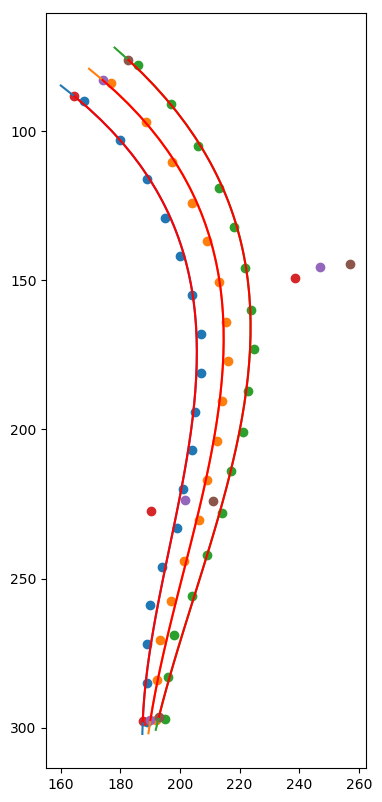

In [106]:
%matplotlib inline
# サンプル点が多すぎるので１６個まで間引く
n = int(len(ll)/16)
ll2 = np.array(ll)[::n]
rl2 = np.array(rl)[::n]
cl2 = np.array(cl)[::n]
ldata,cdata,rdata = fitBezierAndDraw([ll2,cl2,rl2],mode=4,showImage=True)

In [304]:
# import tensorflow as tf

# 点Pを(cx,cy)周りに r ラジアン回転
def rotation(P,r,cx,cy): 
    A1=Matrix(([1,0,-cx], [0,1,-cy],[0,0,1]))  #  center が原点になるように平行移動
    A2=Matrix(([cos(r),-sin(r),0], [sin(r),cos(r),0],[0,0,1])) # 原点周りに r ラジアン回転
    A3=Matrix(([1,0,cx], [0,1,cy],[0,0,1])) # 平行移動させた分だけ戻す
    A4=A3*A2*A1
    return (A4*Matrix([P[0],P[1],1]))[:2]

# 点列Plist 内の点をすべて (cx,cy)周りに r ラジアン回転
def rotationAll(Plist,r,cx,cy):
    return [rotation(P,r,cx,cy) for P in Plist]

def initialize(ldata,cdata,rdata,ll,cl,rl):
    #[cpxl,cpyl,bezXl,bezYl,tpl]=ldata    # 制御点x、y、ベジエ 関数
    #[cpxc,cpyc,bezXc,bezYc,tpc]=cdata
    #[cpxr,cpyr,bezXr,bezYr,tpr]=rdata
    # ll,cl,rl # サンプル点の座標データ　　numpy array
    Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0 = normalizeR(ldata,cdata,rdata,ll,cl,rl,showImage=False)
    x00,y00 = float(cpc0[0][0]),float(cpc0[0][1]) # 軸基準点の推定位置
    x10,y10 = float(cpc0[1][0]),float(cpc0[1][1]) # 軸のP1の推定位置
    x20,y20 = float(cpc0[2][0]),float(cpc0[2][1]) # 軸のP2の推定位置
    x30,y30 = float(cpc0[3][0]),float(cpc0[3][1]) # 軸上端点の推定位置
    a00 = (getDegreeOfALine(x00,y00,x30,y30)-90)/180.0*np.pi
    a10 = (getDegreeOfALine(x00,y00,x10,y10)-90-a00)/180.0*np.pi
    a20 = (getDegreeOfALine(x30,y30,x20,y20)+90-a00)/180.0*np.pi
    
    '''cpl1 = rotationAll(cpl0,-a00,x00,y00)
    cpr1 = rotationAll(cpr0,-a00,x00,y00)
    cpc1 = rotationAll(cpc0,-a00,x00,y00)
    print(cpl0,"\n  ",cpl1)
    print(cpr0,"\n  ",cpr1)
    print(cpc0,"\n  ",cpc1)'''
    
    return Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0,a00,a10,a20,x00,y00 # パラメータの初期値

# 最小二乗法で個別に求めたベジエ曲線の制御点とパラメータ推定値を初期値とする。
def fitcurve0(Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0,a00,x00,y00): 
    # LP,RP 左右のサンプル点、
    # cpr0,cpl0 左右のベジエ 曲線の制御点
    # t0l,t0r 制御点に対応するパラメータ
    
    g = tf.Graph()
    
    with g.as_default():

        #  ここではパラメータは定数として扱ってフィッティングする。　
        tl = tf.constant(tl0, tf.float32)
        tr = tf.constant(tr0, tf.float32)

        pointsL = tf.placeholder(tf.float32, shape=(17,2), name='p')
        pointsR = tf.placeholder(tf.float32,shape=[17,2])
        
        # モデル
        # 中心軸の制御点  [[0, 0], [0, py1], [0, py2], [0, py3]]
        # 左輪郭の制御点 [[0, 0], [-px1, py1], [-px2, py2], [-px3, py3]]
        # 右輪郭の制御点 [[0,0],[px1,py1],[px2,py2],[px3,py3]]
        # これに平行移動(x0,y0), (x0,y0)周りの回転 a0, P0周りの変形 a1, P3 周りの変形 a2 が加わっ他結果
        # が観測形状であると考える。
        
        print(a00,a10,a20,x00,y00,cpc0[1][1],cpc0[2][1],cpc0[3][1],(cpr0[1][0]-cpl0[1][0])/2,(cpr0[2][0]-cpl0[2][0])/2,(cpr0[3][0]-cpl0[3][0])/2)
        py1 = tf.Variable(float(cpc0[1][1]), tf.float32, name='py1')
        py2 = tf.Variable(float(cpc0[2][1]), tf.float32, name='py2')
        py3 = tf.Variable(float(cpc0[3][1]), tf.float32, name='py3')
        px1 = tf.Variable(float((cpr0[1][0]-cpl0[1][0])/2), tf.float32, name='px1')
        px2 = tf.Variable(float((cpr0[2][0]-cpl0[2][0])/2), tf.float32, name='px2')
        px3 = tf.Variable(float((cpr0[3][0]-cpl0[3][0])/2), tf.float32, name='px3')
        a0 = tf.Variable(float(a00), tf.float32, name='a0')
        a1 = tf.Variable(float(a10), tf.float32, name='a1')
        a2 = tf.Variable(float(a20), tf.float32, name='a2')
        x0 = tf.Variable(float(x00), tf.float32, name='x0')
        y0 = tf.Variable(float(y00), tf.float32, name='y0')

        CPC = [[x0, y0], 
               [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (-py1*tf.sin(a1) + x0)*tf.cos(a0) - (py1*tf.cos(a1) + y0)*tf.sin(a0), 
          -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-py1*tf.sin(a1) + x0)*tf.sin(a0) + (py1*tf.cos(a1) + y0)*tf.cos(a0)], 
               [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (-py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.cos(a0) - (py2*tf.cos(a2) 
                - py3*tf.cos(a2) + py3 + y0)*tf.sin(a0), 
          -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.sin(a0) + 
          (py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.cos(a0)], 
         [x0 + y0*tf.sin(a0) - (py3 + y0)*tf.sin(a0), -y0*tf.cos(a0) + y0 + (py3 + y0)*tf.cos(a0)]]
        
        CPL = [[x0, y0], 
               [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) - (-px1*tf.sin(a1) + py1*tf.cos(a1) + y0)*tf.sin(a0) 
                + (-px1*tf.cos(a1) - py1*tf.sin(a1) + x0)*tf.cos(a0), 
                -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-px1*tf.sin(a1) + py1*tf.cos(a1) + y0)*tf.cos(a0) 
                + (-px1*tf.cos(a1) - py1*tf.sin(a1) + x0)*tf.sin(a0)], 
               [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (-px2*tf.cos(a2) - py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.cos(a0) 
                - (-px2*tf.sin(a2) + py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.sin(a0), 
                -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-px2*tf.cos(a2) - py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.sin(a0) 
                + (-px2*tf.sin(a2) + py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.cos(a0)], 
               [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (-px3*tf.cos(a2) + x0)*tf.cos(a0) - (-px3*tf.sin(a2) + py3 + y0)*tf.sin(a0), 
                -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-px3*tf.cos(a2) + x0)*tf.sin(a0) + (-px3*tf.sin(a2) + py3 + y0)*tf.cos(a0)]]
        
        CPR = [[x0, y0], 
               [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) - (px1*tf.sin(a1) + py1*tf.cos(a1) + y0)*tf.sin(a0) + (px1*tf.cos(a1) - py1*tf.sin(a1) + x0)*tf.cos(a0), 
                -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (px1*tf.sin(a1) + py1*tf.cos(a1) + y0)*tf.cos(a0) + (px1*tf.cos(a1) - py1*tf.sin(a1) + x0)*tf.sin(a0)], 
               [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (px2*tf.cos(a2) - py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.cos(a0) 
                - (px2*tf.sin(a2) + py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.sin(a0), 
                -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (px2*tf.cos(a2) - py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.sin(a0) 
                + (px2*tf.sin(a2) + py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.cos(a0)], 
               [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (px3*tf.cos(a2) + x0)*tf.cos(a0) - (px3*tf.sin(a2) + py3 + y0)*tf.sin(a0), 
                -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (px3*tf.cos(a2) + x0)*tf.sin(a0) + (px3*tf.sin(a2) + py3 + y0)*tf.cos(a0)]]
              
        #  ベジエ 曲線の定義式
        #  cps 制御点のリスト
        sl,sr = tf.ones(shape=tf.shape(tl)) - tl, tf.ones(shape=tf.shape(tr)) - tr
        Tl = tf.stack([sl * sl * sl, 3 * sl * sl * tl, 3 * sl * tl * tl, tl * tl * tl])
        Tr = tf.stack([sr * sr * sr, 3 * sr * sr * tr, 3 * sr * tr * tr, tr * tr * tr])
        
        bezL = tf.matmul(Tl,CPL, transpose_a=True) # パラメータから算出される左のベジエ 曲線上の点
        bezR = tf.matmul(Tr,CPR, transpose_a=True) # パラメータから算出される右のベジエ 曲線上の点     
        
        # init = tf.initialize_all_variables()
        init = tf.global_variables_initializer()
        # ロス関数
        loss = tf.reduce_mean(tf.square(pointsL - bezL)+tf.square(pointsR - bezR)

        # 最適化手法の設定。最急降下法　0.1はいわゆる学習係数　適当
        # optimizer = tf.train.GradientDescentOptimizer(0.05)
        optimizer = tf.train.AdamOptimizer(1e-4)
        # loss つまり平均自乗誤差を最急降下で減少させる試みを train と名付ける
        train = optimizer.minimize(loss)         
        g.finalize()
    
    with tf.Session(graph=g) as sess:
        sess.run(init)
        # モデル当てはめのステップを繰り替えし実行
        for step in range(20000001):
            if step % 200000 == 0: # 20 回毎に推定された係数値を表示
                print(step, sess.run([loss],feed_dict={pointsL:Lsamples,pointsR:Rsamples}))
        
        result = sess.run([CPL,CPR,CPC])
        print("result",result)
    
    t,p0,p1,p2,p3 = symbols("t,p0,p1,p2,p3")
    # ３次のベジエ曲線の定義式制御点 P0~P3 とパラメータ　　t　の関数として定義
    bez3 = (1-t)**3*p0 + 3*(1-t)**2*t*p1 + 3*(1-t)*t**2*p2 + t**3*p3
    
    # 結果の描画
    CPL,CPR,CPC =np.array(result[0]),np.array(result[1]),np.array(result[2])
    cpxl = CPL[:,0]
    cpyl = CPL[:,1]
    cpxr = CPR[:,0]
    cpyr = CPR[:,1]
    cpxc = CPC[:,0]
    cpyc = CPC[:,1]
    ll,rl=Lsamples,Rsamples
    
    if True:
        bezXl = bez3.subs([(p0,cpxl[0]),(p1,cpxl[1]),(p2,cpxl[2]),(p3,cpxl[3])])
        bezYl = bez3.subs([(p0,cpyl[0]),(p1,cpyl[1]),(p2,cpyl[2]),(p3,cpyl[3])])
        bezXc = bez3.subs([(p0,cpxc[0]),(p1,cpxc[1]),(p2,cpxc[2]),(p3,cpxc[3])])
        bezYc = bez3.subs([(p0,cpyc[0]),(p1,cpyc[1]),(p2,cpyc[2]),(p3,cpyc[3])])
        bezXr = bez3.subs([(p0,cpxr[0]),(p1,cpxr[1]),(p2,cpxr[2]),(p3,cpxr[3])])
        bezYr = bez3.subs([(p0,cpyr[0]),(p1,cpyr[1]),(p2,cpyr[2]),(p3,cpyr[3])])
        plt.figure(figsize=(7,10),dpi=100)
        # plt.gca().invert_yaxis()
        plt.gca().set_aspect('equal', adjustable='box')
        plt.scatter(np.array(ll)[:,0],np.array(ll)[:,1])
        # plt.scatter(np.array(cl)[:,0],np.array(cl)[:,1])
        plt.scatter(np.array(rl)[:,0],np.array(rl)[:,1])
        tplins = np.linspace(-0.02, 1.02,50)
        plotx = [bezXl.subs(t,tp) for tp in tplins ]
        ploty = [bezYl.subs(t,tp) for tp in tplins ]
        plt.scatter(cpxl,cpyl)
        plt.plot(plotx,ploty)
        tplins = np.linspace(0, 1,50)
        plotx = [bezXl.subs(t,tp) for tp in tplins ]
        ploty = [bezYl.subs(t,tp) for tp in tplins ]
        plt.plot(plotx,ploty,color='red')  
        tplins = np.linspace(-0.02, 1.02,50)
        plotx = [bezXc.subs(t,tp) for tp in tplins ]
        ploty = [bezYc.subs(t,tp) for tp in tplins ]
        plt.scatter(cpxc,cpyc)
        plt.plot(plotx,ploty)
        tplins = np.linspace(0, 1,50)
        plotx = [bezXc.subs(t,tp) for tp in tplins ]
        ploty = [bezYc.subs(t,tp) for tp in tplins ]
        plt.plot(plotx,ploty,color='red')  
        tplins = np.linspace(-0.02, 1.02,50)
        plotx = [bezXr.subs(t,tp) for tp in tplins ]
        ploty = [bezYr.subs(t,tp) for tp in tplins ]
        plt.scatter(cpxr,cpyr)
        plt.plot(plotx,ploty)
        tplins = np.linspace(0, 1,50)
        plotx = [bezXr.subs(t,tp) for tp in tplins ]
        ploty = [bezYr.subs(t,tp) for tp in tplins ]
        plt.plot(plotx,ploty,color='red')  
    
    return result
'''    
#
# 各データ点に対応する媒介変数値{t[i]:i=0,N-1}についての最適化
# 各引数は、phase1()に同じ
#
def fitcurve1(Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0,a00,x00,y00):
    g = tf.Graph()
    with g.as_default():
        
        # t1の両端を切り取る st1.shape = (N-2,)
        sl0 = tl0[1:len(tl0) - 1]
        sr0 = tr0[1:len(tr0) - 1]

        # t[0]を0に固定するための定数
        fti = tf.constant([0.])

        # t[N-1]を1に固定するための定数
        ftf = tf.constant([1.])

        # 両端を切り取ったt1を初期値として、1階の変数Tensorを作成する
        sl = tf.Variable(sl0, tf.float32)
        sr = tf.Variable(sr0, tf.float32)

        # stの両端に定数を加えて、1階のTensorを作成する
        tl = tf.concat(0, [fti, sl, ftf])
        tr = tf.concat(0, [fti, sr, ftf])
        
        # 入力に相当する1個で、4x2サイズの教師データ。bs.shape = (4,2)
        CPL = tf.constant(cpl0)
        CPR = tf.constant(cpr0)

        # T.shape = (4, N)
        s = 1 - t
        T = tf.pack([s * s * s, 3 * s * s * t, 3 * s * t * t, t * t * t])

        # 各{t_i;i=0,n-1}に対して、補間曲線を計算する。r.shape = (N, 2)
        bezL = tf.matmul(T, CPL, transpose_a=True)
        bezR = tf.matmul(T, CPR, transpose_a=True)

        init = tf.initialize_all_variables()
        # ロス関数
        loss1 = tf.reduce_mean(tf.square(pointsL - bezL))
        loss2 = tf.reduce_mean(tf.square(pointsR - bezR))

        # 最適化手法の設定。最急降下法　0.1はいわゆる学習係数　適当
        optimizer = tf.train.GradientDescentOptimizer(0.0000005)
        # loss つまり平均自乗誤差を最急降下で減少させる試みを train と名付ける
        train = optimizer.minimize(loss1+loss2) 
        
        init = tf.global_variables_initializer()
        
        g.finalize()

    with tf.Session(graph=g) as sess:
        sess.run(init)
        # モデル当てはめのステップを繰り替えし実行
        for step in range(20000001):
            if step % 200000 == 0: # 20 回毎に推定された係数値を表示
                print(step, sess.run([loss1,loss2],feed_dict={pointsL:Lsamples,pointsR:Rsamples}))
        
        result2 = sess.run([a0,a1,a2,x0,y0,py1,py2,py3,px1,px2,px3])

    return result2
'''

SyntaxError: invalid syntax (<ipython-input-304-4da40c08176d>, line 122)

0.07461265381607068 -0.15844352549490368 0.8600114307087801 0.0 0.0 0.343403069583558 0.708242688311381 1.00000000000000 0.0479551075135513 0.0427761727935858 0.0420605986401022
0 [0.17996898, 0.2061252]
200000 [0.17996898, 0.2061252]
400000 [0.17996898, 0.2061252]
600000 [0.17996898, 0.2061252]
800000 [0.17996898, 0.2061252]
1000000 [0.17996898, 0.2061252]
1200000 [0.17996898, 0.2061252]
1400000 [0.17996898, 0.2061252]
1600000 [0.17996898, 0.2061252]
1800000 [0.17996898, 0.2061252]
2000000 [0.17996898, 0.2061252]
2200000 [0.17996898, 0.2061252]
2400000 [0.17996898, 0.2061252]
2600000 [0.17996898, 0.2061252]
2800000 [0.17996898, 0.2061252]
3000000 [0.17996898, 0.2061252]
3200000 [0.17996898, 0.2061252]
3400000 [0.17996898, 0.2061252]
3600000 [0.17996898, 0.2061252]
3800000 [0.17996898, 0.2061252]
4000000 [0.17996898, 0.2061252]
4200000 [0.17996898, 0.2061252]
4400000 [0.17996898, 0.2061252]
4600000 [0.17996898, 0.2061252]
4800000 [0.17996898, 0.2061252]
5000000 [0.17996898, 0.2061252]


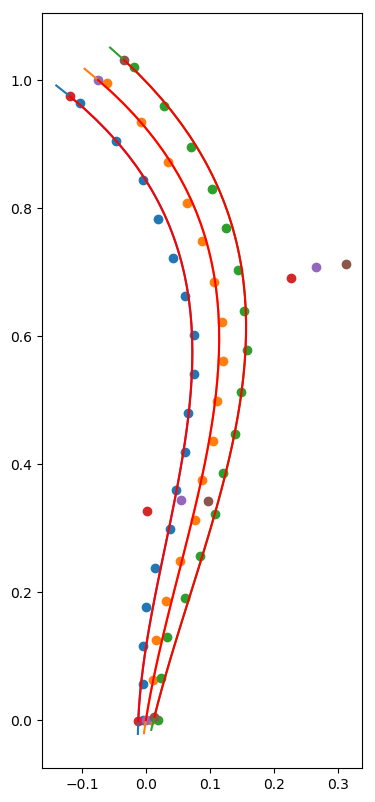

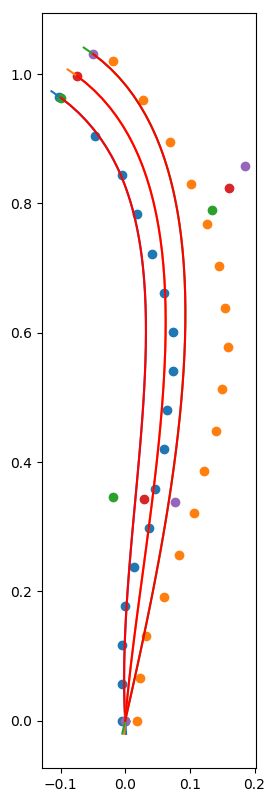

In [305]:
# サンプル点が多すぎるので１６個まで間引く
n = int(len(ll)/16)
ll2 = np.array(ll)[::n]
rl2 = np.array(rl)[::n]
cl2 = np.array(cl)[::n]
Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0,a00,a10,a20,x00,y00 = initialize(ldata,cdata,rdata,ll2,cl2,rl2)
ans = fitcurve0(Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0,a00,x00,y00)

In [264]:
ans

[[[0.0, 0.0],
  [-0.01903263, 0.34621254],
  [0.13472486, 0.78947055],
  [-0.09953253, 0.9633853]]]

In [265]:
cpl0

In [174]:
cpr0

In [ ]:
x30,y30 = float(cpr0[3][0]),float(cpc0[3][1])

In [ ]:
x30,y30

In [47]:
np.pi